Imports, download best weights if not existing yet:

In [30]:
## Necessary minimum imports:
import os
import zipfile

try:
    import gdown
except ImportError:
    !pip install gdown
    import gdown

try:
    from ultralytics import YOLO
except ImportError:
        !pip install ultralytics
        from ultralytics import YOLO


url = 'https://drive.google.com/uc?export=download&id=1ecSZpmcOiOrf2j5rm-eXpKyxzV-oPaWP'
output = 'best_weights.pt'

test_set_url = 'https://drive.google.com/uc?export=download&id=1bO_z9RcAPBi34StRlvbX1ryG5p7ErJ88'
test_set_output = 'YOLO.zip'

if not os.path.exists(output):
    print("Downloading best weights...")
    gdown.download(url, output, quiet=False)
else:
    print(f"{output} already exists.")

if not os.path.exists('YOLO'):
    print("Downloading test set...")
    gdown.download(test_set_url, test_set_output, quiet=False)
    print("Extracting test set...")
    with zipfile.ZipFile(test_set_output, 'r') as zip_ref:
        zip_ref.extractall()
    print("Test set extracted.")
else:
    print(f"{test_set_output} already exists.")


best_weights.pt already exists.


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1bO_z9RcAPBi34StRlvbX1ryG5p7ErJ88
From (redirected): https://drive.google.com/uc?export=download&id=1bO_z9RcAPBi34StRlvbX1ryG5p7ErJ88&confirm=t&uuid=d8b5a9af-9727-41a4-95dd-8c75e317e9f8
To: /Users/sam/EPFL/ENV-540 IPEO/IPEO_Project_Group_4/YOLO.zip
100%|██████████| 57.4M/57.4M [00:15<00:00, 3.65MB/s]


Extracting test set...
Test set extracted.



image 1/1 /Users/sam/EPFL/ENV-540 IPEO/IPEO_Project_Group_4/YOLO/images/test/2780_1138_3_2.tif: 640x640 11 rocks, 3056.5ms
Speed: 8.4ms preprocess, 3056.5ms inference, 11.0ms postprocess per image at shape (1, 3, 640, 640)


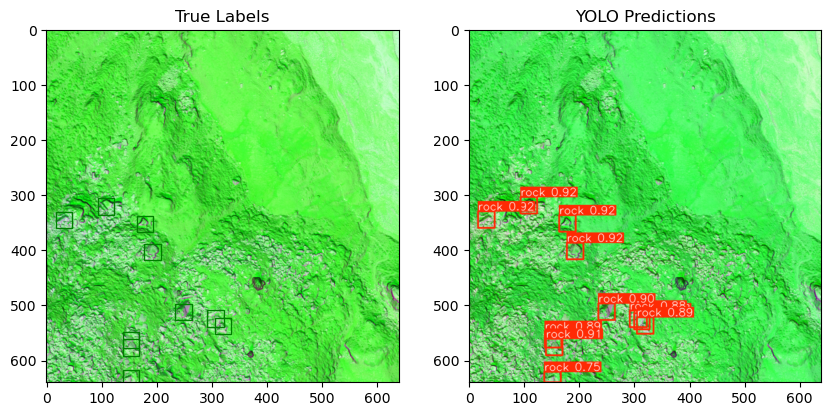


image 1/1 /Users/sam/EPFL/ENV-540 IPEO/IPEO_Project_Group_4/YOLO/images/test/2604_1101_0_3.tif: 640x640 (no detections), 3102.5ms
Speed: 1.2ms preprocess, 3102.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


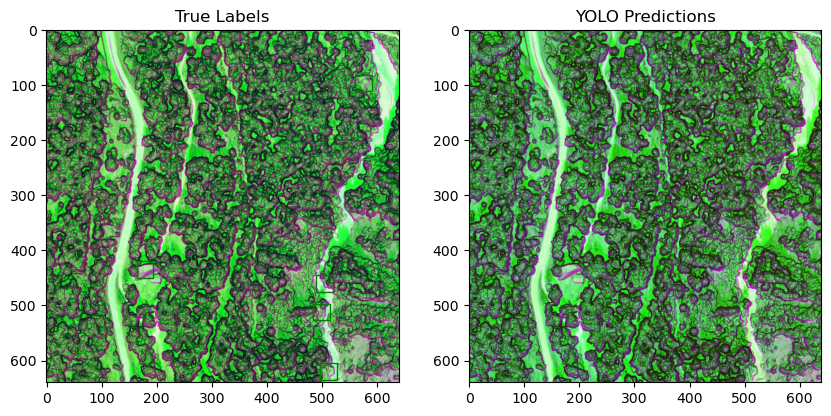


image 1/1 /Users/sam/EPFL/ENV-540 IPEO/IPEO_Project_Group_4/YOLO/images/test/2640_1111_3_3.tif: 640x640 1 rock, 3183.1ms
Speed: 1.2ms preprocess, 3183.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


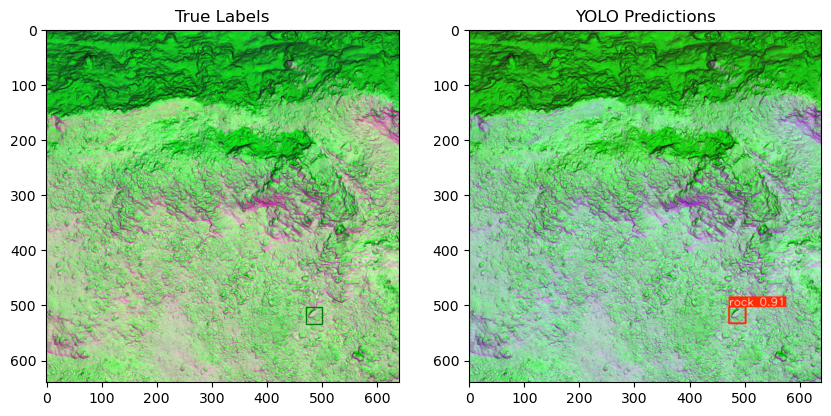


image 1/1 /Users/sam/EPFL/ENV-540 IPEO/IPEO_Project_Group_4/YOLO/images/test/2780_1139_3_3.tif: 640x640 (no detections), 3054.9ms
Speed: 0.9ms preprocess, 3054.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


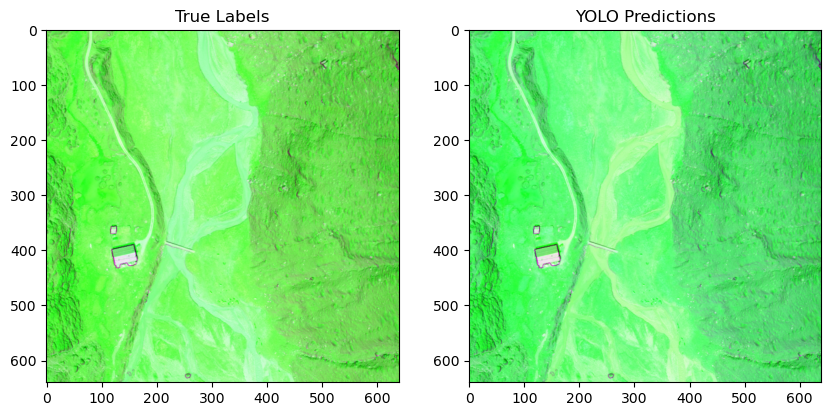


image 1/1 /Users/sam/EPFL/ENV-540 IPEO/IPEO_Project_Group_4/YOLO/images/test/2626_1106_0_0.tif: 640x640 (no detections), 3071.8ms
Speed: 1.1ms preprocess, 3071.8ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


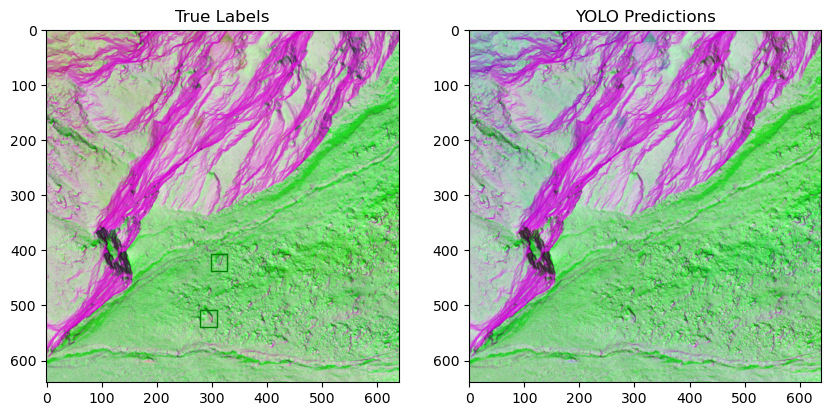

In [31]:
import random
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os

# Load the YOLO model
model = YOLO("best_weights.pt")

# Paths to the test images and labels
test_image_folder = "YOLO/images/test"
test_label_folder = "YOLO/labels/test"

# Get a list of test images
test_images = os.listdir(test_image_folder)

# Select 5 random test images
random_test_images = random.sample(test_images, 5)

def plot_image_with_labels_and_predictions(image_path, label_path, model):
    # Load the image
    img = plt.imread(image_path)
    
    # Run YOLO prediction
    results = model.predict(image_path)
    
    # Load the true labels
    with open(label_path, 'r') as f:
        true_labels = f.readlines()
    
    # Plot the image with true labels
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    img = plt.imread(image_path.replace('YOLO_2/images/test', 'swissImage_50cm_patches'))
    plt.imshow(img)
    plt.title("True Labels")
    for label in true_labels:
        _, x_center, y_center, width, height = map(float, label.strip().split())
        x_min = int((x_center - width / 2) * img.shape[1])
        y_min = int((y_center - height / 2) * img.shape[0])
        x_max = int((x_center + width / 2) * img.shape[1])
        y_max = int((y_center + height / 2) * img.shape[0])
        plt.gca().add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, edgecolor='g', facecolor='none'))
    
    # Plot the image with YOLO predictions
    plt.subplot(1, 2, 2)
    labeled_img = results[0].plot(show=False)
    plt.imshow(labeled_img)
    plt.title("YOLO Predictions")
    
    plt.show()

# Plot the images with true labels and YOLO predictions
for image_name in random_test_images:
    image_path = os.path.join(test_image_folder, image_name)
    label_path = os.path.join(test_label_folder, image_name.replace('.tif', '.txt'))
    plot_image_with_labels_and_predictions(image_path, label_path, model)
